## KMeans Clustering Using BankMarketing DataSet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\Bankmarketing.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
le=LabelEncoder()
df["job"]=le.fit_transform(df["job"])
df["marital"]=le.fit_transform(df["marital"])
df["education"]=le.fit_transform(df["education"])
df["default"]=le.fit_transform(df["default"])
df["housing"]=le.fit_transform(df["housing"])
df["loan"]=le.fit_transform(df["loan"])
df["contact"]=le.fit_transform(df["contact"])
df["month"]=le.fit_transform(df["month"])
df["day_of_week"]=le.fit_transform(df["day_of_week"])
df["poutcome"]=le.fit_transform(df["poutcome"])
df["y"]=le.fit_transform(df["y"])


In [6]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [7]:
x=df

In [8]:
k=[1,2,3,4,5,6,7,8,9,10]

In [9]:
from sklearn.cluster import KMeans
color=["g","b","y","g","o"]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_ )

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

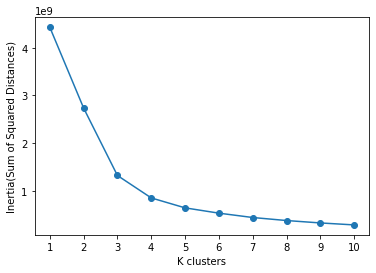

In [10]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

In [11]:
model=KMeans(n_clusters=5)
model.fit(x)

KMeans(n_clusters=5)

In [12]:
model.labels_

array([0, 1, 1, ..., 1, 0, 0])

In [13]:
model.cluster_centers_

array([[ 3.99712204e+01,  3.65759616e+00,  1.17018725e+00,
         3.67862743e+00,  2.10312702e-01,  1.07250254e+00,
         3.19066507e-01,  3.75518864e-01,  4.28235403e+00,
         2.02711927e+00,  3.36633244e+02,  2.28207730e+00,
         9.99000000e+02,  1.30338530e-01,  8.87372014e-01,
         1.54967254e-03,  9.35675187e+01, -4.06089198e+01,
         3.52827156e+00,  5.16285002e+03,  1.14380592e-01],
       [ 3.99522200e+01,  3.72794297e+00,  1.16476578e+00,
         3.75914460e+00,  2.18574338e-01,  1.07352342e+00,
         3.31853360e-01,  3.83014257e-01,  4.18093686e+00,
         1.98207739e+00,  1.18726965e+02,  2.75690428e+00,
         9.99000000e+02,  1.12749491e-01,  8.97759674e-01,
         2.37625255e-01,  9.35896717e+01, -4.05261711e+01,
         3.81035976e+00,  5.17659006e+03,  2.49287169e-02],
       [ 4.18735020e+01,  4.24567244e+00,  1.29027963e+00,
         4.25432756e+00,  3.99467377e-02,  1.12250333e+00,
         3.28894807e-01,  7.19041278e-02,  4.79826897e

In [14]:
model.n_iter_

41

In [15]:
data=df
data["Customer Group"]=model.labels_

In [16]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Customer Group
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,1,1,5,0,0,0,0,7,0,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,5,1,6,0,2,0,0,7,0,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,1
41186,44,9,1,5,0,0,0,0,7,0,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [17]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Customer Group
0,56,3,1,0,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,7,1,3,1,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
2,37,7,1,3,0,2,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
3,40,0,1,1,0,0,0,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
4,56,7,1,3,0,0,2,1,6,1,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0
41184,46,1,1,5,0,0,0,0,7,0,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,5,1,6,0,2,0,0,7,0,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0,1
41186,44,9,1,5,0,0,0,0,7,0,...,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1,0


In [18]:
x=df[[ 'job', 'loan']]

In [20]:
x

,job,loan
0,3,0
1,7,0
2,7,0
3,0,0
4,7,2
...,...,...
41183,5,0
41184,1,0
41185,5,0
41186,9,0


In [21]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(x)
    ssd.append(model.inertia_)
    

Text(0, 0.5, 'inrtia(sum of squared Distance)')

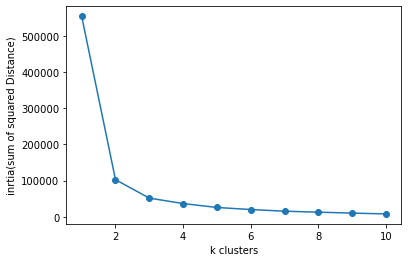

In [26]:
plt.plot(k,ssd,marker='o')
plt.xticks()
plt.xlabel("k clusters")
plt.ylabel("inrtia(sum of squared Distance)")

In [27]:
model=KMeans(n_clusters=3)
model.fit(x)

KMeans(n_clusters=3)

In [32]:
Groups_labels=model.labels_
centriod=model.cluster_centers_
centriod

array([[8.44791586, 0.32317686],
       [0.57571456, 0.33442173],
       [4.49150877, 0.31438596]])

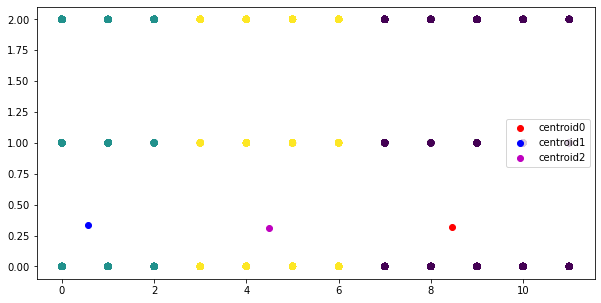

In [36]:
#plotting The Clusters
fig=plt.figure(figsize=(10,5))
plt.scatter(df["job"],df["loan"],c=Groups_labels)
color=["r","b","m","k","c","y"]
for i in range(centriod.shape[0]):
    plt.scatter(centriod[i][0],centriod[i][1],color=color[i],label=str("centroid"+str(i)))
plt.legend()    

In [37]:
data=x
data["Customer Group"]=Groups_labels

<ipython-input-37-0937ddc59a49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Customer Group"]=Groups_labels


In [38]:
data

,job,loan,Customer Group
0,3,0,2
1,7,0,0
2,7,0,0
3,0,0,1
4,7,2,0
...,...,...,...
41183,5,0,2
41184,1,0,1
41185,5,0,2
41186,9,0,0
